# Predicting heart diseases using machine learning

# 1st DATA ANALYSIS PART

#preparing the tools first 
we are going to use pandas,Matplotlib,numpy for data analysis and manipulation

In [1]:
## importing all the tools we need

## REGULAT EDA(Exploring data analysis) and plotting labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# WE WANT OUR PLOT TO APPEAR INSIDE THE NOTEBOOK

# MODEL FROM SCIKIT LEARN(SEE THE MAP FOR THESE)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Models for Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


# Load the data

In [2]:
df=pd.read_csv("heart-disease(1).csv")
df.shape    #(rows,column)

(303, 14)

In [3]:
# DATA Exploration (explorarory data analysis or EDA)

## The goal here is to find out the data and become a subject matter expert on the data

1. What question are we trying to solve?
2. What kind of data we have and how to treat with different types?
3. Waht is the missing data how to deal with it?
4. Where are the outliers and why should we care about it>
5. How can we add ,change or remove features to get more out of your dataMM

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
## Lets find out how many of each class is there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

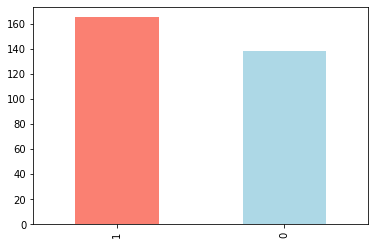

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()       ## check for missing or not and see data type is it string ,float,int etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
## ANother way to check if there is any missing value or not is
df.isna().sum()  ##If hoga missing value then we got sum more than 1

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### We will try to find the pattern in our data by comparing differnt column of the given data

#####  lets compare age and target
#####  lets compare sex to target
#####   lets compare cp to target
#####  simillarly comapre all feature column to the target 

# Heart diseases frequency according to sex

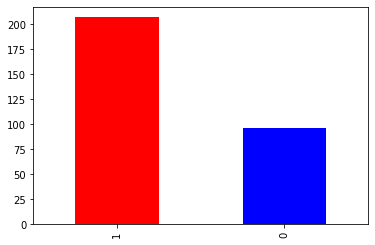

In [11]:
df.sex.value_counts().plot(kind="bar",color=["red","blue"]);

In [12]:
## compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


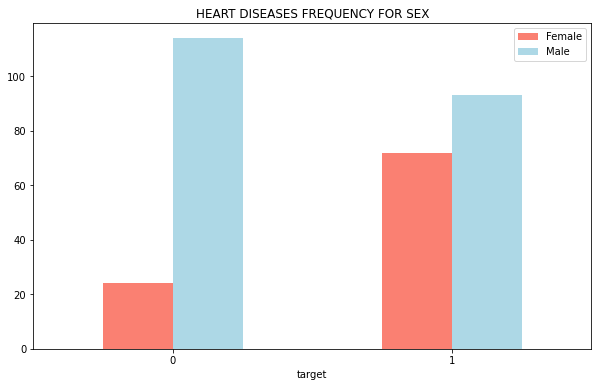

In [13]:
## create a plot of cross-tab

pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("HEART DISEASES FREQUENCY FOR SEX");
plt.xlabel=("0=NO-DISEASes,1=DISEASES")
plt.ylabel=("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [14]:
## thalac ,age and target lets compare

# Age vs Avg Heart Diseases for Heaet Diseases

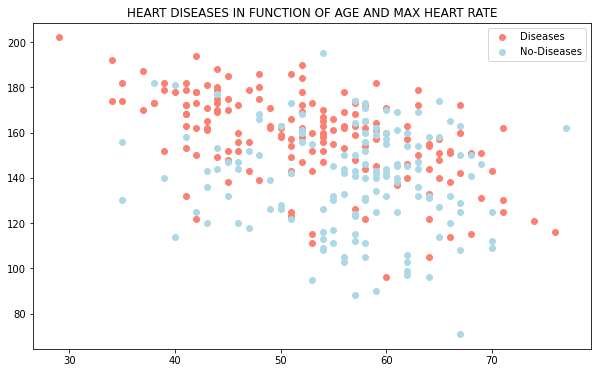

In [15]:
## Create another figure
plt.figure(figsize=(10,6))

## Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

## Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

## Add some helpful info

plt.title("HEART DISEASES IN FUNCTION OF AGE AND MAX HEART RATE")
#plt.xlabel("AGE")
#plt.ylabel("MAX HEART RATE")
plt.legend(["Diseases","No-Diseases"]);



######   Distribution of age column with a histogram

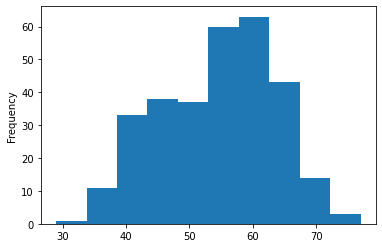

In [16]:
df.age.plot.hist(); ## see the outlier if yes remove from set

# Heart Diseases Frequency for  per chest pain type

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


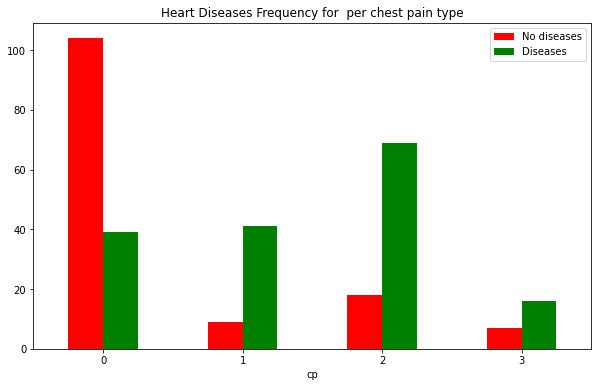

In [18]:
# make more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["red","green"])
plt.title("Heart Diseases Frequency for  per chest pain type")
plt.xlabel=('Chest pain Type');
plt.ylabel=('Amout');
plt.legend(["No diseases","Diseases"])
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
## Make a corelation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


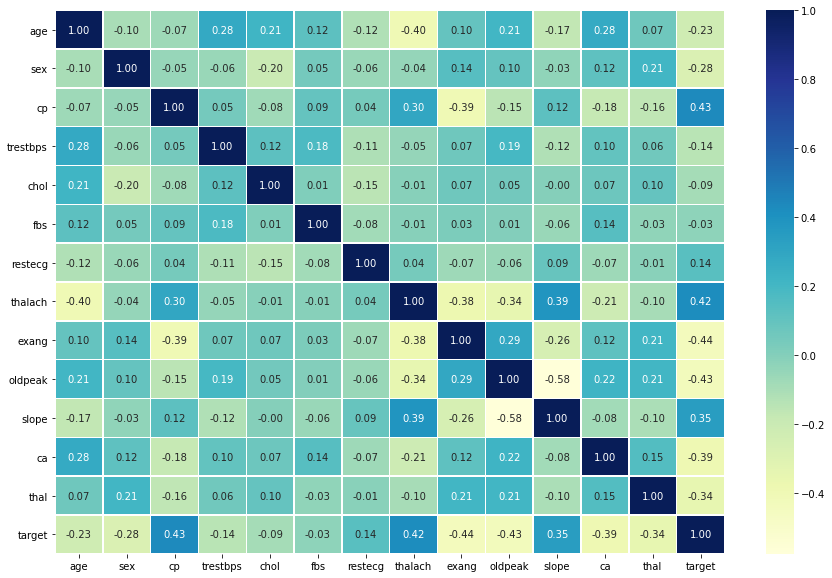

In [21]:
## Lets makes our corelation matrix little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")


# Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
##Split the data into x and y
x=df.drop("target",axis=1);
y=df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
## split the data into test and train set

np.random.seed(42);

## Split into train & test set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)


In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## Now we have got our data split into training and test set now its time to train it (fins the patterns on training set   and we will test(use the pattern on the test set)

# WE are going to try three different ml model
1. Logistic Regression(see why regresion in documentation)
2. K Neighbour Classifier
3. Random Forest Classifier

## THIS IS EXPERIMENT PHASE

In [29]:
## Put models in a dictionary

models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

## Create a function to fit and score model
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of differences Scikit-Learn machine learning model
    X_train: training data (no label)
    X_test:testing data(no label)
    Y_train:training labbel
    Y_test:testing label
    """
    ## set the random seed
    np.random.seed();
    ## Make a dictionary to keep model Score
    model_scores={}
    ## Loops through the models
    for name,model in models.items():
        ## Fit the model to the data
        model.fit(X_train,Y_train)
        ## Evaluate the model ans append the score to model_score
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [30]:
model_scores=fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            Y_train=Y_train,
                            Y_test=Y_test)
model_scores

/home/raushan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model comparision

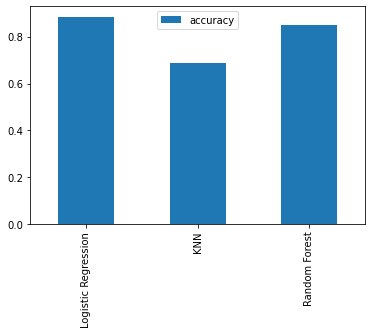

In [31]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# Now we have got a baseline model and we know our 1st model prediction re not always based on our next step off What should do?

# Lets look at yhe following
* Hyperparameter tunning
* Feature importane
* Confusion_matrix
* Cross_validation
* Precession
*  Recall
* F1 Score
* Classifiaction Report
* Roc Curve
* Area under the Curve(AUC)

# Hyperparameter Tunning

## SEE HOW TO TUNE WITH KNN  (research on goggle)


In [32]:
train_scores=[]
test_scores=[]

# create a list of different values for n_neighbor
neighbors=range(1,20)

## Set up knn instances
knn=KNeighborsClassifier()

## Loop through different n neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    ## Fit the algorithm
    knn.fit(X_train,Y_train)
    
    #Update the training score  list
    train_scores.append(knn.score(X_train,Y_train))
    
    ## Update the test Scores list
    test_scores.append(knn.score(X_test,Y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

Maximim KNN score in the test data:75.41%


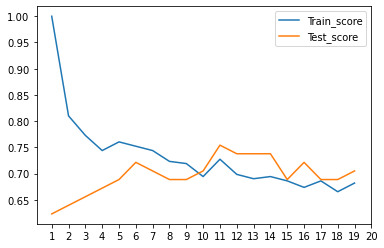

In [35]:
plt.plot(neighbors,train_scores,label="Train_score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.xticks(np.arange(1,21,1))
#plt.xlabel("Number of neighbours");
#plt.ylabel("Model Score")
plt.legend()
print(f"Maximim KNN score in the test data:{max(test_scores)*100:.2f}%")

## since kNN not worked for us by hyperparamerter tunning by hand we done lets dicard it

# Hyperparameter Tunning with Randomized CV(CROSS VALIDATION) not by hand as we have done before

## Lets tune on 
* Logistic Regression model
* Random forest classifier model
 using Randomised CV (SEE THE DOCUMENTAION HOW TO TUNE RANDOM FOREST CLASSIFIER AND LOGISTIC REGREESION)



## In cross validation it creates a lot of set of training and test data see mobile photo (mainly it split the train and test data in different permutation and combination way)

In [36]:
# create a hyperparameter for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

## Create a hyperparameter for Random Forest Classifier

rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


#Now we ahve got hyperparemets grids setup for each of our models,lets tune them using RandomisedSearchCv

In [37]:
## Tune the Logistic Regression

np.random.seed();

### set up random hyperparameter search for Logidtic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
## Fit the hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Now we have tuned the Logistic regression lets do the same for Random forest classifier

In [40]:
# Set up random seed
np.random.seed(42)

#Set up random hyperparameter search for Random ForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
## Fit the hyperparameter search model for Logistic Regression
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
## Evaluate the Randomised search RandomForest Classifier model
rs_rf.score(X_test,Y_test)

0.8688524590163934

## HYPERPARAMETER TUNNING USING GRIDSEARCHCV

since our logistic model provide the best scores so far ,we will try and improve them using GridSearch CV

In [43]:
# Different Tuning with GridSearch CV

log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

## Set up hyperparameter search for Logistic Regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

## FIt grif hyper parameter search model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
## Evaluate the Logistic model grid search LogisticRegreesion model
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [46]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

# Evaluating our tuned machine learning classifier ,beyond accuracy 
* ROC curve ans AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

and it would be great id cross_validation was used ehrer possible

To make comparisions and evaluate trained model,first we need to make prediction

In [47]:
## make prediction  with tuned model

y_preds=gs_log_reg.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

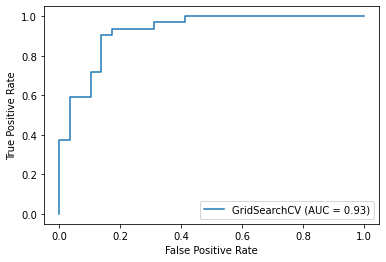

In [53]:
## IMPORT ROC CUVER FUNCTION WITH SKLEARN Metrics 

## Plot ROC curve and calculate  AUC metric
plot_roc_curve(gs_log_reg,X_test,Y_test);

### Confusion Matrix

In [56]:
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


TypeError: 'str' object is not callable

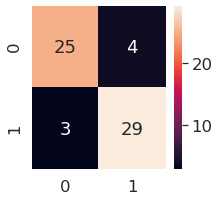

In [64]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,y_preds):
    """
    Plot nice looking vonfusion metrics using seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                  annot=True,
                  cbar=True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted labbel")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
    
plot_conf_mat(Y_test,y_preds)

Now we have got a roc-curve and confusion metricd and lets get a classification report as well as cross-validation precision,recall anf f1-score

In [67]:
print(classification_report(Y_test,y_preds))  ## this is  done using only 1 split 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

we are going to calculate precision ,recall and f1-score of our model using cross-validation and to so we will be using 'cross_val_score()'


In [70]:
### Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
### Create a new classifier with best parameters
clf= LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [74]:
## Cross validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [76]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [79]:
## Cross validation precesion

cv_precision=cross_val_score(clf,
                            x,y,
                             
                            cv=5,
                            scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision


0.8207936507936507

In [81]:
## Cross-validation recall

cv_recall=cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [83]:
## Cross validation f1-score
cv_f1_score=cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="f1")

cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

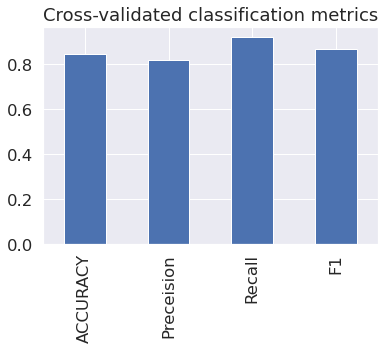

In [86]:
### Visu-alize our cross validated matrix
cv_metrics=pd.DataFrame({"ACCURACY":cv_acc,
                        "Preceision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1_score},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

#### Feature importantance

Feature importance is another as asking "WHich feature contributed m most to the outcome of the model and how did they contribute"

Finding feature importance is different for every machine learning model

so check for Logistic Regression

Lets find the feature importance for our Logistic Regression model


In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
### Fit an instance of Logistice Regression

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [94]:
clf=LogisticRegression(C= 0.20433597178569418,
                      solver='liblinear')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [97]:
#check coef_
clf.coef_  ## how much age,sex,cp,etc contribute their

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
### Match coef's of feature to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

### what this is telling us how much the each  feature column contribute to the target

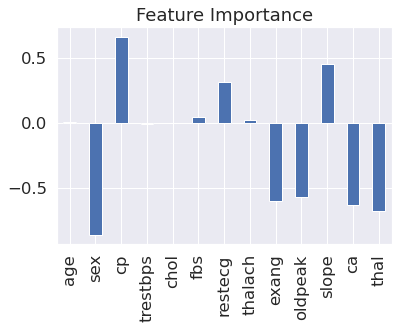

In [101]:
## Visualize the feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                     legend=False);

In [102]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [103]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6 Experimentation

if you have not hit your evaluation metric yet....asj yourself...
* Could you collect more data?
* Could you try a better model>> Like CatBoost or XGBoost??
* Could you improve the current model ?(beyond that what we have done so far )
* If your model is good enoufgh (you have hit  your evaluation metric ) how would you export it share it with others? 